In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import auth
import gspread
from google.auth import default


In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('DL').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'int':'float'})
dataset1 = dataset1.astype({'out':'float'})

In [ ]:
dataset1.head()

,int,out
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
x = dataset1[['int']].values
y = dataset1[['out']].values

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
Ai_Brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
Ai_Brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
Ai_Brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2167.5864
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 2165.6819
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2164.2371
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2163.0107
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2161.9072
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2160.8828
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2159.9136
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2158.9839
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2158.0833
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2157.2053
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2156.3438
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2155.4949
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2154.6555
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2153.8235
Epoch 15/2000
1/1 ━━━━━━━━━━━━

In [ ]:
loss_df = pd.DataFrame(Ai_Brain.history.history)

<Axes: >

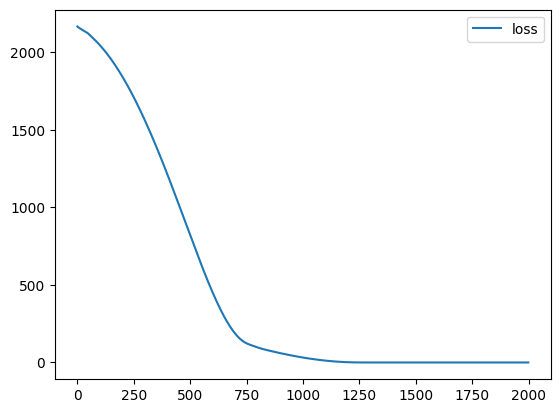

In [ ]:
loss_df.plot()

In [ ]:
x_test1 = Scaler.transform(x_test)

In [ ]:
Ai_Brain.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0043


0.004342551808804274

In [ ]:
x_n1 = [[7]]

In [ ]:
x_n1_1 = Scaler.transform(x_n1)

In [ ]:
Ai_Brain.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[71.09674]], dtype=float32)